In [7]:
# %%
import time
import dask
import dask.dataframe as dd
from dask.distributed import Client
from joblib import parallel_backend
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# %%
# Inizializza il client Dask
client = Client()
client


/home/emanuele_fossi1201/jupyter_env/lib/python3.11/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46161 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:46161/status,
Dashboard: http://127.0.0.1:46161/status,Workers: 4
Total threads: 4,Total memory: 3.83 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35949,Workers: 0
Dashboard: http://127.0.0.1:46161/status,Total threads: 0
Started: Just now,Total memory: 0 B
Comm: tcp://127.0.0.1:33739,Total threads: 1
Dashboard: http://127.0.0.1:36899/status,Memory: 0.96 GiB
Nanny: tcp://127.0.0.1:42221,


In [9]:
# %%
# Caricamento del dataset (da Google Cloud Storage via gcsfs o da locale)
ddf = dd.read_csv("gs://big-data-bucket-test/dataset/EDA_Student_Depression_Dataset.csv")
df = ddf.compute()

# %%
# Preprocessing base: rimozione nulli
df.dropna(inplace=True)
X = df.drop("Depression", axis=1)
y = df["Depression"]

In [10]:
# %%
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# %%
# Addestramento con Random Forest usando Dask come backend per joblib
with parallel_backend('dask'):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print(f"\u23F1 Tempo di addestramento: {end - start:.2f} secondi")


⏱ Tempo di addestramento: 4.48 secondi


In [12]:
# %%
# Predizione e valutazione
y_pred = clf.predict(X_test)
print("\n\u2705 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2321
           1       0.86      0.87      0.87      3229

    accuracy                           0.84      5550
   macro avg       0.84      0.84      0.84      5550
weighted avg       0.84      0.84      0.84      5550



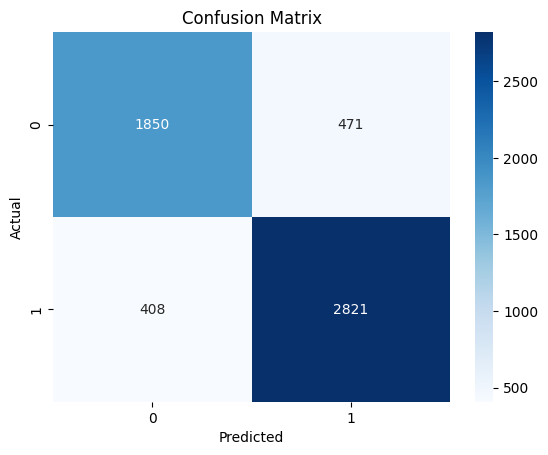

In [13]:
# %%
# Matrice di Confusione
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
